In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

data = pd.read_csv("houseprice.csv", usecols=cols_to_use)

data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [3]:
data.isnull().sum()

LotFrontage    259
OverallQual      0
MasVnrArea       8
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
GarageYrBlt     81
WoodDeckSF       0
SalePrice        0
dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [5]:
X_train.isnull().mean()

LotFrontage    0.184932
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.052838
WoodDeckSF     0.000000
dtype: float64

In [7]:
vars_to_impute = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]
vars_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

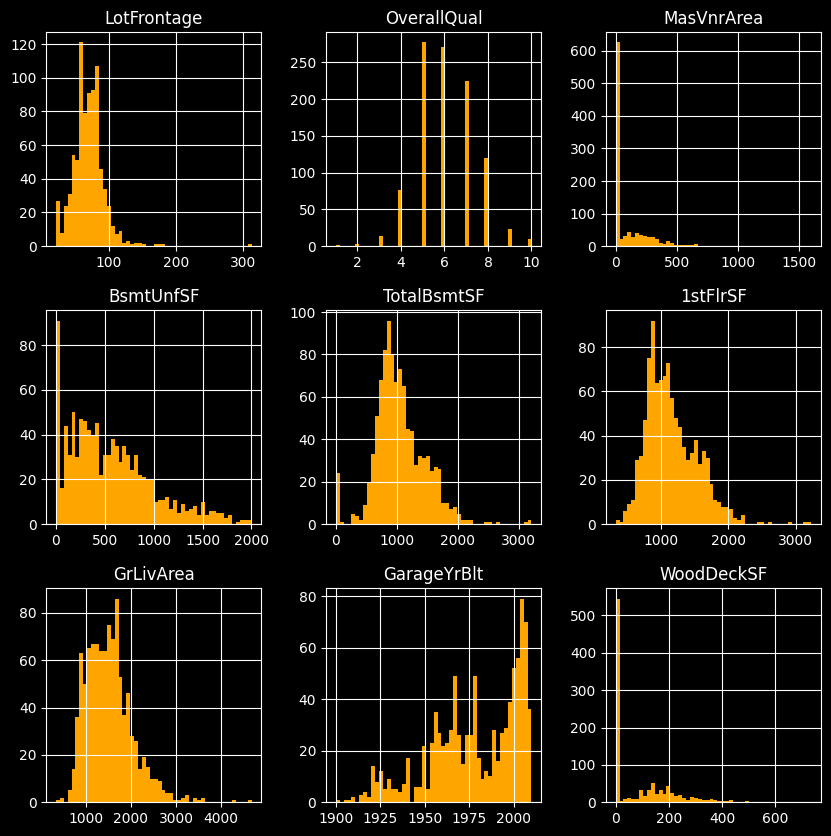

In [8]:
plt.style.use("dark_background")
X_train.hist(bins=50,figsize=(10,10),color="orange")
plt.show()

In [10]:
imputation_dict = X_train[vars_to_impute].median().to_dict()
imputation_dict

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1979.0}

In [11]:
X_train.fillna(imputation_dict,inplace=True)
X_test.fillna(imputation_dict,inplace=True)

In [12]:
X_train.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

In [13]:
cols_to_use = ["BsmtQual", "FireplaceQu", "SalePrice"]
data = pd.read_csv("houseprice.csv", usecols=cols_to_use)

data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [14]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
SalePrice        0
dtype: int64

In [15]:
data.groupby("FireplaceQu")[["SalePrice"]].agg(["mean","count"])

SalePrice      
                      mean count
FireplaceQu                     
Ex           337712.500000    24
Fa           167298.484848    33
Gd           226351.415789   380
Po           129764.150000    20
TA           205723.488818   313

In [16]:
# Let's separate into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 2), (438, 2))

In [17]:
X_train[["BsmtQual", "FireplaceQu"]].mode()

,BsmtQual,FireplaceQu
0,TA,Gd


In [18]:
imputation_dict = X_train[["BsmtQual", "FireplaceQu"]].mode().iloc[0].to_dict()
imputation_dict

{'BsmtQual': 'TA', 'FireplaceQu': 'Gd'}

In [19]:
X_train.fillna(imputation_dict,inplace=True)
X_test.fillna(imputation_dict,inplace=True)

In [20]:
cols_to_use = ["BsmtQual", "FireplaceQu", "SalePrice"]
data = pd.read_csv("houseprice.csv", usecols=cols_to_use)

data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [23]:

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 2), (438, 2))

In [24]:
imputation_dict = {"BsmtQual":"Missing",
                   "FireplaceQu":"Missing"}
imputation_dict

{'BsmtQual': 'Missing', 'FireplaceQu': 'Missing'}

In [26]:
X_train.fillna(imputation_dict,inplace=True)
X_test.fillna(imputation_dict,inplace=True)

In [27]:
X_train.FireplaceQu.value_counts()

FireplaceQu
Missing    478
Gd         255
TA         229
Fa          26
Ex          18
Po          16
Name: count, dtype: int64

In [28]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "BsmtQual",
    "FireplaceQu",
    "SalePrice",
]

data = pd.read_csv("houseprice.csv", usecols=cols_to_use)

data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,Gd,150,856,856,1710,NaN,2003.0,0,208500
1,80.0,6,0.0,Gd,284,1262,1262,1262,TA,1976.0,298,181500
2,68.0,7,162.0,Gd,434,920,920,1786,TA,2001.0,0,223500
3,60.0,7,0.0,TA,540,756,961,1717,Gd,1998.0,0,140000
4,84.0,8,350.0,Gd,490,1145,1145,2198,TA,2000.0,192,250000


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 11), (438, 11))

In [30]:
nums = list(X_train.select_dtypes(include="number"))
nums

['LotFrontage',
 'OverallQual',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'WoodDeckSF']

In [31]:
cats = list(X_train.select_dtypes(exclude="number"))
cats

['BsmtQual', 'FireplaceQu']

In [32]:
imputation_dict = X_train[nums].median().to_dict()
imputation_dict.update(X_train[cats].mode().iloc[0].to_dict())
imputation_dict

{'LotFrontage': 69.0,
 'OverallQual': 6.0,
 'MasVnrArea': 0.0,
 'BsmtUnfSF': 486.5,
 'TotalBsmtSF': 992.0,
 '1stFlrSF': 1095.0,
 'GrLivArea': 1479.0,
 'GarageYrBlt': 1979.0,
 'WoodDeckSF': 0.0,
 'BsmtQual': 'TA',
 'FireplaceQu': 'Gd'}

In [33]:
X_train.isna().astype(int)

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF
64,1,0,0,0,0,0,0,0,1,0,0
682,1,0,0,0,0,0,0,0,0,0,0
960,0,0,0,0,0,0,0,0,1,1,0
1384,0,0,0,0,0,0,0,0,1,0,0
1100,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,0,0,0,0,0,0
835,0,0,0,0,0,0,0,0,1,0,0
1216,0,0,0,1,0,0,0,0,1,0,0
559,1,0,0,0,0,0,0,0,0,0,0


In [34]:
indicators = [f"{var}_na" for var in X_train.columns]
indicators

['LotFrontage_na',
 'OverallQual_na',
 'MasVnrArea_na',
 'BsmtQual_na',
 'BsmtUnfSF_na',
 'TotalBsmtSF_na',
 '1stFlrSF_na',
 'GrLivArea_na',
 'FireplaceQu_na',
 'GarageYrBlt_na',
 'WoodDeckSF_na']

In [35]:
X_train[indicators] = X_train.isna().astype(int)
X_train.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,...,OverallQual_na,MasVnrArea_na,BsmtQual_na,BsmtUnfSF_na,TotalBsmtSF_na,1stFlrSF_na,GrLivArea_na,FireplaceQu_na,GarageYrBlt_na,WoodDeckSF_na
64,NaN,7,573.0,Gd,318,1057,1057,2034,NaN,1998.0,...,0,0,0,0,0,0,0,1,0,0
682,NaN,6,0.0,Gd,288,1291,1291,1291,Gd,1996.0,...,0,0,0,0,0,0,0,0,0,0
960,50.0,5,0.0,TA,162,858,858,858,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0
1384,60.0,6,0.0,TA,356,560,698,1258,NaN,1939.0,...,0,0,0,0,0,0,0,1,0,0
1100,60.0,2,0.0,TA,0,290,438,438,NaN,1930.0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
X_test[indicators] = X_test.isna().astype(int)

In [37]:
X_train.fillna(imputation_dict,inplace=True)
X_test.fillna(imputation_dict,inplace=True)

In [38]:
X_train.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,...,OverallQual_na,MasVnrArea_na,BsmtQual_na,BsmtUnfSF_na,TotalBsmtSF_na,1stFlrSF_na,GrLivArea_na,FireplaceQu_na,GarageYrBlt_na,WoodDeckSF_na
64,69.0,7,573.0,Gd,318,1057,1057,2034,Gd,1998.0,...,0,0,0,0,0,0,0,1,0,0
682,69.0,6,0.0,Gd,288,1291,1291,1291,Gd,1996.0,...,0,0,0,0,0,0,0,0,0,0
960,50.0,5,0.0,TA,162,858,858,858,Gd,1979.0,...,0,0,0,0,0,0,0,1,1,0
1384,60.0,6,0.0,TA,356,560,698,1258,Gd,1939.0,...,0,0,0,0,0,0,0,1,0,0
1100,60.0,2,0.0,TA,0,290,438,438,Gd,1930.0,...,0,0,0,0,0,0,0,1,0,0
